In [1]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
life_exp = pd.read_csv('../data/life-expectancy.csv')
life_exp

,Entity,Code,Year,Period life expectancy at birth - Sex: total - Age: 0
0,Afghanistan,AFG,1950,28.1563
1,Afghanistan,AFG,1951,28.5836
2,Afghanistan,AFG,1952,29.0138
3,Afghanistan,AFG,1953,29.4521
4,Afghanistan,AFG,1954,29.6975
...,...,...,...,...
21560,Zimbabwe,ZWE,2019,61.0603
21561,Zimbabwe,ZWE,2020,61.5300
21562,Zimbabwe,ZWE,2021,60.1347
21563,Zimbabwe,ZWE,2022,62.3601


In [3]:
life_exp = life_exp.rename(columns= {
    "Entity": "Country Name", 
    "Code": "Country Code", 
    "Period life expectancy at birth - Sex: total - Age: 0": "Life Expectancy",
    "Year": "Birth Year"})
life_exp['Life Expectancy'] = life_exp['Life Expectancy'].round(0).astype('int')

In [4]:
gdp_per_capita = pd.read_csv('../data/gdp_per_cap_Data.csv')
gdp_per_capita = gdp_per_capita.drop(columns = ['Series Code'])
gdp_per_capita

,Series Name,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,"Population, total",Afghanistan,AFG,8622466,8790140,8969047,9157465,9355514,9565147,9783147,...,32716210,33753499,34636207,35643418,36686784,37769499,38972230,40099462,41128771,42239854
1,"Population, total",Albania,ALB,1608800,1659800,1711319,1762621,1814135,1864791,1914573,...,2889104,2880703,2876101,2873457,2866376,2854191,2837849,2811666,2777689,2745972
2,"Population, total",Algeria,DZA,11394307,11598608,11778260,11969451,12179099,12381256,12613389,...,38760168,39543154,40339329,41136546,41927007,42705368,43451666,44177969,44903225,45606480
3,"Population, total",American Samoa,ASM,20085,20626,21272,21949,22656,23391,24122,...,52217,51368,50448,49463,48424,47321,46189,45035,44273,43914
4,"Population, total",Andorra,AND,9443,10216,11014,11839,12690,13563,14546,...,71621,71746,72540,73837,75013,76343,77700,79034,79824,80088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10853,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
col_list = gdp_per_capita.columns.to_list()[0:]
col_list

['Series Name',
 'Country Name',
 'Country Code',
 '1960 [YR1960]',
 '1961 [YR1961]',
 '1962 [YR1962]',
 '1963 [YR1963]',
 '1964 [YR1964]',
 '1965 [YR1965]',
 '1966 [YR1966]',
 '1967 [YR1967]',
 '1968 [YR1968]',
 '1969 [YR1969]',
 '1970 [YR1970]',
 '1971 [YR1971]',
 '1972 [YR1972]',
 '1973 [YR1973]',
 '1974 [YR1974]',
 '1975 [YR1975]',
 '1976 [YR1976]',
 '1977 [YR1977]',
 '1978 [YR1978]',
 '1979 [YR1979]',
 '1980 [YR1980]',
 '1981 [YR1981]',
 '1982 [YR1982]',
 '1983 [YR1983]',
 '1984 [YR1984]',
 '1985 [YR1985]',
 '1986 [YR1986]',
 '1987 [YR1987]',
 '1988 [YR1988]',
 '1989 [YR1989]',
 '1990 [YR1990]',
 '1991 [YR1991]',
 '1992 [YR1992]',
 '1993 [YR1993]',
 '1994 [YR1994]',
 '1995 [YR1995]',
 '1996 [YR1996]',
 '1997 [YR1997]',
 '1998 [YR1998]',
 '1999 [YR1999]',
 '2000 [YR2000]',
 '2001 [YR2001]',
 '2002 [YR2002]',
 '2003 [YR2003]',
 '2004 [YR2004]',
 '2005 [YR2005]',
 '2006 [YR2006]',
 '2007 [YR2007]',
 '2008 [YR2008]',
 '2009 [YR2009]',
 '2010 [YR2010]',
 '2011 [YR2011]',
 '2012 [YR2012

In [6]:
gdp_per_capita = gdp_per_capita.melt(id_vars= ['Series Name', 'Country Name', 'Country Code'], value_vars = col_list)
gdp_per_capita

,Series Name,Country Name,Country Code,variable,value
0,"Population, total",Afghanistan,AFG,1960 [YR1960],8622466
1,"Population, total",Albania,ALB,1960 [YR1960],1608800
2,"Population, total",Algeria,DZA,1960 [YR1960],11394307
3,"Population, total",American Samoa,ASM,1960 [YR1960],20085
4,"Population, total",Andorra,AND,1960 [YR1960],9443
...,...,...,...,...,...
694715,NaN,NaN,NaN,2023 [YR2023],NaN
694716,NaN,NaN,NaN,2023 [YR2023],NaN
694717,NaN,NaN,NaN,2023 [YR2023],NaN
694718,Data from database: World Development Indicators,NaN,NaN,2023 [YR2023],NaN


In [7]:
gdp_per_capita = gdp_per_capita.rename(columns = {'variable': 'Year', 'value': 'GDP per Capita'})
gdp_per_capita

,Series Name,Country Name,Country Code,Year,GDP per Capita
0,"Population, total",Afghanistan,AFG,1960 [YR1960],8622466
1,"Population, total",Albania,ALB,1960 [YR1960],1608800
2,"Population, total",Algeria,DZA,1960 [YR1960],11394307
3,"Population, total",American Samoa,ASM,1960 [YR1960],20085
4,"Population, total",Andorra,AND,1960 [YR1960],9443
...,...,...,...,...,...
694715,NaN,NaN,NaN,2023 [YR2023],NaN
694716,NaN,NaN,NaN,2023 [YR2023],NaN
694717,NaN,NaN,NaN,2023 [YR2023],NaN
694718,Data from database: World Development Indicators,NaN,NaN,2023 [YR2023],NaN


In [8]:
gdp_per_capita['Year'] = gdp_per_capita['Year'].str[:4]
gdp_per_capita

,Series Name,Country Name,Country Code,Year,GDP per Capita
0,"Population, total",Afghanistan,AFG,1960,8622466
1,"Population, total",Albania,ALB,1960,1608800
2,"Population, total",Algeria,DZA,1960,11394307
3,"Population, total",American Samoa,ASM,1960,20085
4,"Population, total",Andorra,AND,1960,9443
...,...,...,...,...,...
694715,NaN,NaN,NaN,2023,NaN
694716,NaN,NaN,NaN,2023,NaN
694717,NaN,NaN,NaN,2023,NaN
694718,Data from database: World Development Indicators,NaN,NaN,2023,NaN


In [9]:
gdp_per_capita = gdp_per_capita.loc[gdp_per_capita['Series Name'] == 'GDP per capita (current US$)'].reset_index(drop=True)
gdp_per_capita = gdp_per_capita.drop(columns= ['Series Name'])
gdp_per_capita

,Country Name,Country Code,Year,GDP per Capita
0,Afghanistan,AFG,1960,..
1,Albania,ALB,1960,..
2,Algeria,DZA,1960,239.033005807284
3,American Samoa,ASM,1960,..
4,Andorra,AND,1960,..
...,...,...,...,...
13883,Virgin Islands (U.S.),VIR,2023,..
13884,West Bank and Gaza,PSE,2023,3367.60699023864
13885,"Yemen, Rep.",YEM,2023,..
13886,Zambia,ZMB,2023,1369.12936484937


In [10]:
noc_regions = pd.read_csv('../data/noc_regions.csv')
noc_regions
# NOC= Nationaal Olympic Committee 3-Letter Code

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [11]:
noc_regions = noc_regions.rename(columns = {'region': 'Country Name', 'notes': 'Region'})
noc_regions

,NOC,Country Name,Region
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [12]:
ath_events = pd.read_csv('../data/athlete_events.csv')
ath_events

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [13]:
ath_events['Birth Year'] = ath_events.Year - ath_events.Age
ath_events = ath_events.loc[ath_events.Year >= 1984]
ath_events

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Birth Year
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,1968.0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,1989.0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,1967.0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,1967.0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,1967.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,1983.0
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,1987.0
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,1987.0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,1968.0


In [14]:
gold_medalists = ath_events.loc[ath_events['Medal'] == 'Gold']

gold_medalists = gold_medalists.reset_index(drop=True)

gold_medalists

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Birth Year
0,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,1972.0
1,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold,1972.0
2,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Combined,Gold,1972.0
3,20,Kjetil Andr Aamodt,M,34.0,176.0,85.0,Norway,NOR,2006 Winter,2006,Winter,Torino,Alpine Skiing,Alpine Skiing Men's Super G,Gold,1972.0
4,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,1981.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6708,135501,Ellina Aleksandrovna Zvereva (Kisheyeva-),F,39.0,183.0,100.0,Belarus,BLR,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's Discus Throw,Gold,1961.0
6709,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold,1981.0
6710,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold,1976.0
6711,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold,1967.0


In [15]:
silver_medalists = ath_events.loc[ath_events['Medal'] == 'Silver']

silver_medalists = silver_medalists.reset_index(drop=True)

silver_medalists

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Birth Year
0,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver,1972.0
1,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Combined,Silver,1972.0
2,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver,1970.0
3,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver,1986.0
4,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver,1985.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,135486,Viktor Valeryevich Zuyev,M,21.0,188.0,91.0,Belarus,BLR,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Heavyweight,Silver,1983.0
6641,135489,Anastasiya Valeryevna Zuyeva-Fesikova,F,22.0,182.0,71.0,Russia,RUS,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 200 metres Backstroke,Silver,1990.0
6642,135522,"Klaas Erik ""Klaas-Erik"" Zwering",M,23.0,189.0,80.0,Netherlands,NED,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Silver,1981.0
6643,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,25.0,200.0,93.0,Netherlands,NED,1992 Summer,1992,Summer,Barcelona,Volleyball,Volleyball Men's Volleyball,Silver,1967.0


In [16]:
bronze_medalists = ath_events.loc[ath_events['Medal'] == 'Bronze']

bronze_medalists = bronze_medalists.reset_index(drop=True)

bronze_medalists

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Birth Year
0,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,1986.0
1,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze,1972.0
2,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze,1972.0
3,29,Willemien Aardenburg,F,22.0,NaN,NaN,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze,1966.0
4,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,1973.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6961,135508,Vera Igorevna Zvonaryova,F,23.0,172.0,59.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Tennis,Tennis Women's Singles,Bronze,1985.0
6962,135525,Martin Zwicker,M,29.0,175.0,64.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Hockey,Hockey Men's Hockey,Bronze,1987.0
6963,135535,Claudia Antoinette Zwiers,F,22.0,181.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Judo,Judo Women's Middleweight,Bronze,1974.0
6964,135545,Henk Jan Zwolle,M,27.0,197.0,93.0,Netherlands,NED,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Double Sculls,Bronze,1965.0


In [17]:
ath_events['Name'].value_counts()

Name
Andreas Wecker                      32
Michael Fred Phelps, II             30
Yordan Yovchev Yovchev              30
Oksana Aleksandrovna Chusovitina    29
Ole Einar Bjrndalen                 27
                                    ..
Antti-Jussi Kemppainen               1
Marko Kemppainen                     1
Richard M. "Rich" Kenah              1
Abbas Haj Kenari                     1
Katja Maarit Lehto                   1
Name: count, Length: 73250, dtype: int64

In [18]:
ath_events['Medal'].value_counts()

Medal
Bronze    6966
Gold      6713
Silver    6645
Name: count, dtype: int64

In [19]:
ath_events['Sport'].value_counts()

Sport
Athletics                    19849
Swimming                     14310
Gymnastics                    9799
Cross Country Skiing          6170
Alpine Skiing                 5390
Cycling                       5335
Rowing                        5154
Shooting                      5109
Biathlon                      4319
Canoeing                      4026
Sailing                       3536
Fencing                       3471
Football                      3401
Ice Hockey                    3238
Judo                          3216
Wrestling                     3199
Speed Skating                 3106
Hockey                        3100
Equestrianism                 3063
Boxing                        2913
Handball                      2826
Basketball                    2397
Volleyball                    2368
Weightlifting                 2154
Tennis                        2024
Table Tennis                  1955
Water Polo                    1871
Archery                       1843
Bobsleigh     

In [20]:
ath_events['Event'].value_counts()

Event
Ice Hockey Men's Ice Hockey                       2484
Football Men's Football                           2389
Hockey Men's Hockey                               1732
Handball Men's Handball                           1589
Water Polo Men's Water Polo                       1383
                                                  ... 
Freestyle Skiing Women's Halfpipe                   23
Freestyle Skiing Women's Slopestyle                 22
Wrestling Women's Featherweight, Freestyle          19
Wrestling Women's Light-Heavyweight, Freestyle      18
Judo Men's Open Class                               15
Name: count, Length: 474, dtype: int64

In [21]:
frames = [gold_medalists, silver_medalists, bronze_medalists]

medalists = pd.concat(frames)

medalists.reset_index(drop=True)

medalists = medalists.loc[medalists['Season'] == 'Summer'].reset_index(drop=True)

medalists

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Birth Year
0,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,1981.0
1,72,Aleksey Aleksandrovich Abalmasov,M,28.0,180.0,83.0,Belarus,BLR,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Gold,1980.0
2,73,Luc Abalo,M,23.0,182.0,86.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,Gold,1985.0
3,73,Luc Abalo,M,27.0,182.0,86.0,France,FRA,2012 Summer,2012,Summer,London,Handball,Handball Men's Handball,Gold,1985.0
4,76,Jouan Patrice Abanda Etong,M,22.0,185.0,82.0,Cameroon,CMR,2000 Summer,2000,Summer,Sydney,Football,Football Men's Football,Gold,1978.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16624,135508,Vera Igorevna Zvonaryova,F,23.0,172.0,59.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Tennis,Tennis Women's Singles,Bronze,1985.0
16625,135525,Martin Zwicker,M,29.0,175.0,64.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Hockey,Hockey Men's Hockey,Bronze,1987.0
16626,135535,Claudia Antoinette Zwiers,F,22.0,181.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Judo,Judo Women's Middleweight,Bronze,1974.0
16627,135545,Henk Jan Zwolle,M,27.0,197.0,93.0,Netherlands,NED,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Double Sculls,Bronze,1965.0


In [22]:
medalists.Name.value_counts().head(7)

Name
Michael Fred Phelps, II                            28
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)    12
Ryan Steven Lochte                                 12
Dara Grace Torres (-Hoffman, -Minas)               12
Natalie Anne Coughlin (-Hall)                      12
Aleksey Yuryevich Nemov                            12
Birgit Fischer-Schmidt                             11
Name: count, dtype: int64

In [23]:
top5_medalists = medalists.loc[medalists['Name'].isin(['Michael Fred Phelps, II', 'Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)',
                        'Ryan Steven Lochte', 'Dara Grace Torres (-Hoffman, -Minas)',
                        'Natalie Anne Coughlin (-Hall)'])]

top5_medalists = top5_medalists.reset_index(drop=True)

top5_medalists

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Birth Year
0,23426,Natalie Anne Coughlin (-Hall),F,21.0,173.0,63.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,Gold,1983.0
1,23426,Natalie Anne Coughlin (-Hall),F,21.0,173.0,63.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Women's 100 metres Backstroke,Gold,1983.0
2,23426,Natalie Anne Coughlin (-Hall),F,25.0,173.0,63.0,United States,USA,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Women's 100 metres Backstroke,Gold,1983.0
3,70965,Ryan Steven Lochte,M,20.0,188.0,88.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Gold,1984.0
4,70965,Ryan Steven Lochte,M,24.0,188.0,88.0,United States,USA,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Gold,1984.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,119922,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",F,27.0,177.0,69.0,United States,USA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Women's 100 metres Freestyle,Bronze,1973.0
72,121258,"Dara Grace Torres (-Hoffman, -Minas)",F,21.0,183.0,68.0,United States,USA,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze,1967.0
73,121258,"Dara Grace Torres (-Hoffman, -Minas)",F,33.0,183.0,68.0,United States,USA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Women's 50 metres Freestyle,Bronze,1967.0
74,121258,"Dara Grace Torres (-Hoffman, -Minas)",F,33.0,183.0,68.0,United States,USA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Women's 100 metres Freestyle,Bronze,1967.0


In [24]:
top5_medalists[['Name', 'Medal']].value_counts()

Name                                             Medal 
Michael Fred Phelps, II                          Gold      23
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)  Gold       8
Ryan Steven Lochte                               Gold       6
Natalie Anne Coughlin (-Hall)                    Bronze     5
Dara Grace Torres (-Hoffman, -Minas)             Bronze     4
                                                 Gold       4
                                                 Silver     4
Natalie Anne Coughlin (-Hall)                    Silver     4
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)  Silver     3
Michael Fred Phelps, II                          Silver     3
Natalie Anne Coughlin (-Hall)                    Gold       3
Ryan Steven Lochte                               Bronze     3
                                                 Silver     3
Michael Fred Phelps, II                          Bronze     2
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)  Bronze     1
Name: count, d

In [25]:
top5_medalists['Age'].describe()

count    76.000000
mean     25.513158
std       5.355355
min      17.000000
25%      21.000000
50%      25.000000
75%      27.000000
max      41.000000
Name: Age, dtype: float64

In [26]:
data = {'Name': ["Michael Fred Phelps, II, USA", "Jennifer Elisabeth 'Jenny' Thompson (-Cumpelik), USA", "Ryan Steven Lochte. USA", 
                 "Dara Grace Torres (-Hoffman, -Minas), USA", "Natalie Anne Coughlin (-Hall), USA"],
        'Gold': [23, 8, 6,  4, 3],
        'Silver': [3, 3, 3, 4, 4],
        'Bronze': [2, 1, 3, 4, 5]}

top5_medals_count = pd.DataFrame(data)

top5_medals_count

,Name,Gold,Silver,Bronze
0,"Michael Fred Phelps, II, USA",23,3,2
1,Jennifer Elisabeth 'Jenny' Thompson (-Cumpelik...,8,3,1
2,Ryan Steven Lochte. USA,6,3,3
3,"Dara Grace Torres (-Hoffman, -Minas), USA",4,4,4
4,"Natalie Anne Coughlin (-Hall), USA",3,4,5


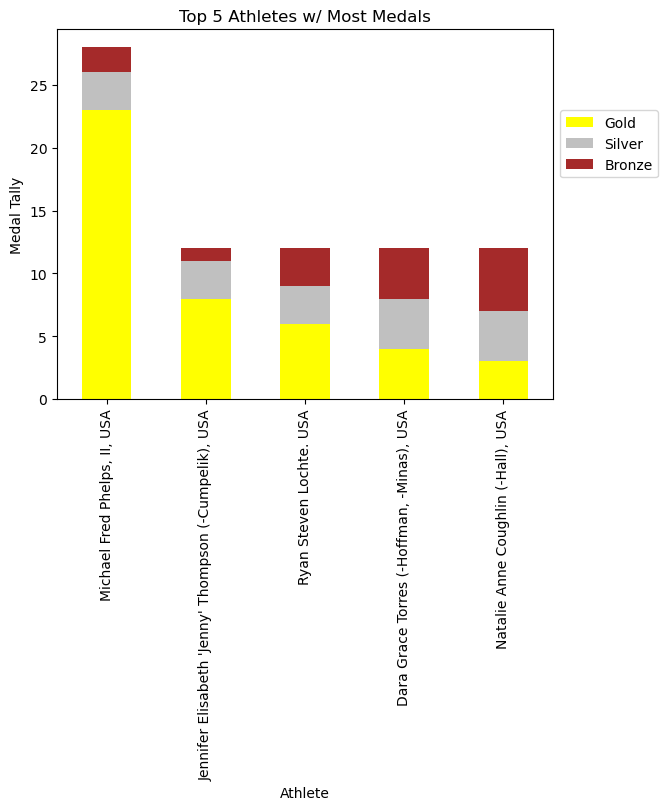

In [27]:
top5_medals_count.plot(kind='bar', stacked=True, x='Name', color=['yellow', 'silver', 'brown'])

plt.xlabel('Athlete')
plt.ylabel('Medal Tally')
plt.title('Top 5 Athletes w/ Most Medals')
plt.legend(bbox_to_anchor = (1, 0.8), loc = 'upper left')
plt.savefig('top5_overall.png', transparent=True, bbox_inches='tight')
plt.show()

In [28]:
country_medals = medalists[['Team', 'Medal']].value_counts()
country_medals = country_medals.to_frame().reset_index()
country_medals.head(15)

,Team,Medal,count
0,United States,Gold,1157
1,United States,Silver,631
2,United States,Bronze,550
3,Australia,Bronze,385
4,Germany,Bronze,360
5,Germany,Gold,324
6,Australia,Silver,322
7,Russia,Bronze,320
8,China,Silver,299
9,China,Gold,294


In [29]:
top_sport = medalists[['Sport', 'Medal']]
grouped = top_sport.groupby('Sport')
top_sport = grouped['Medal'].value_counts()
top_sport = top_sport.to_frame().reset_index()
top_sport

,Sport,Medal,count
0,Archery,Bronze,66
1,Archery,Gold,66
2,Archery,Silver,66
3,Athletics,Gold,554
4,Athletics,Silver,549
...,...,...,...
103,Weightlifting,Silver,115
104,Weightlifting,Bronze,114
105,Wrestling,Bronze,221
106,Wrestling,Gold,168


In [30]:
top_sport.sort_values(by='count', ascending=False).head(16)

,Sport,Medal,count
75,Swimming,Gold,583
3,Athletics,Gold,554
4,Athletics,Silver,549
5,Athletics,Bronze,538
76,Swimming,Silver,532
77,Swimming,Bronze,510
60,Rowing,Silver,451
61,Rowing,Bronze,450
62,Rowing,Gold,447
48,Hockey,Gold,290


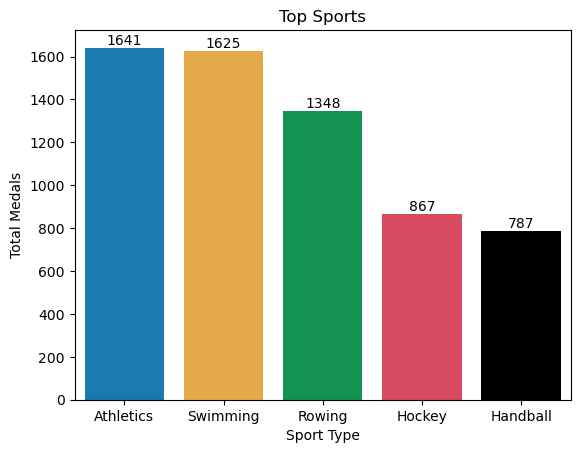

In [31]:
data = {'Sport': ['Athletics', 'Swimming', 'Rowing', 'Hockey', 'Handball'],
        'Medals': [(554 + 549 + 538), (583 + 532 + 510), (447 + 451 + 450),
                  (290 + 288 + 289), (258 + 264 + 265)]}

custom_palette = sns.color_palette(["#0081C8", "#FCB131", "#00A651", "#EE334E", "#000000"])

ax = sns.barplot(x='Sport', y='Medals', data=data, palette=custom_palette, hue='Sport', legend=False)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
plt.title('Top Sports')
plt.xlabel('Sport Type')
plt.ylabel('Total Medals')
plt.savefig('top_sports.png', transparent=True)

plt.show()

In [32]:
country_medals.head(15)

,Team,Medal,count
0,United States,Gold,1157
1,United States,Silver,631
2,United States,Bronze,550
3,Australia,Bronze,385
4,Germany,Bronze,360
5,Germany,Gold,324
6,Australia,Silver,322
7,Russia,Bronze,320
8,China,Silver,299
9,China,Gold,294


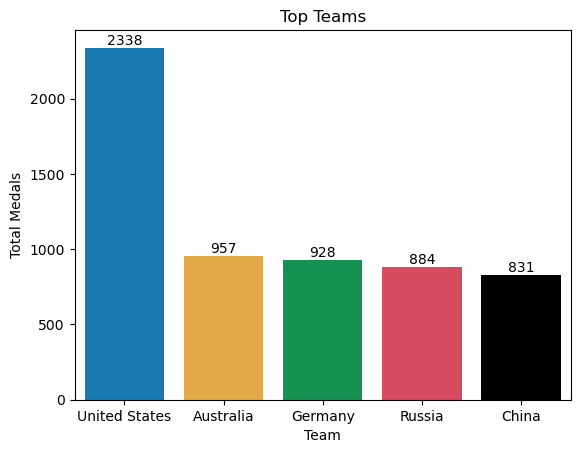

In [33]:
data = {'Team': ['United States', 'Australia', 'Germany', 'Russia', 'China'],
        'Medals': [(1157+631+550), (250+322+385), (324+244+360), (293+271+320), (294+299+238)]}

custom_palette = sns.color_palette(["#0081C8", "#FCB131", "#00A651", "#EE334E", "#000000"])

ax = sns.barplot(x='Team', y='Medals', data=data, palette=custom_palette, hue='Team', legend=False)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
plt.title('Top Teams')
plt.xlabel('Team')
plt.ylabel('Total Medals')
plt.savefig('country_medals.png', transparent=True)

plt.show()

In [34]:
data = {'Team': ['United States', 'Australia', 'Germany', 'Russia', 'China'],
        
        'Gold': [1157, 250, 324,  293, 294],
        'Silver': [631, 322, 244, 271, 299],
        'Bronze': [550, 385, 360, 320, 238]}

country_breakdown = pd.DataFrame(data)

country_breakdown

,Team,Gold,Silver,Bronze
0,United States,1157,631,550
1,Australia,250,322,385
2,Germany,324,244,360
3,Russia,293,271,320
4,China,294,299,238


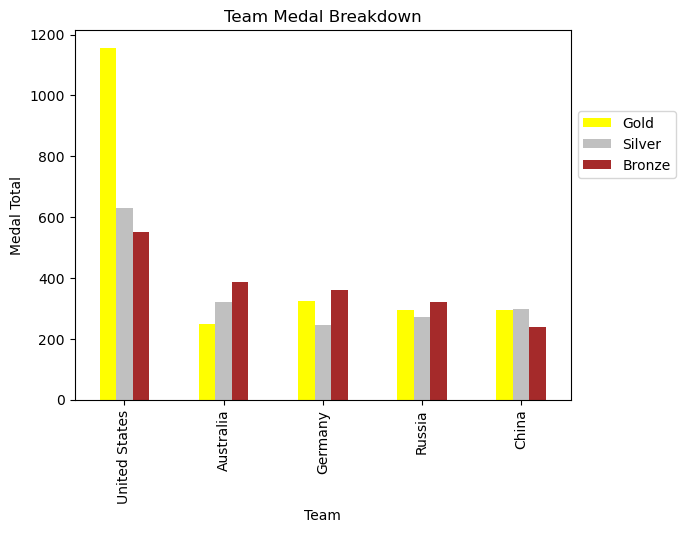

In [35]:
country_breakdown.plot(kind='bar', x='Team', color=['yellow', 'silver', 'brown'])

plt.xlabel('Team')
plt.ylabel('Medal Total')
plt.title('Team Medal Breakdown')
plt.legend(bbox_to_anchor = (1, 0.8), loc = 'upper left')
plt.savefig('medal_breakdown.png', transparent=True, bbox_inches='tight')
plt.show()

In [36]:
athletics = medalists.loc[medalists['Sport'] == 'Athletics'].reset_index(drop=True)
athletics[['Team', 'Medal']].value_counts().head(25)

Team           Medal 
United States  Gold      200
               Silver    104
Jamaica        Silver     68
United States  Bronze     65
Russia         Silver     45
Great Britain  Bronze     45
Jamaica        Bronze     40
Great Britain  Silver     35
Kenya          Silver     31
Jamaica        Gold       31
Russia         Gold       29
               Bronze     29
Kenya          Gold       25
Nigeria        Bronze     24
Kenya          Bronze     22
Great Britain  Gold       20
France         Bronze     20
Cuba           Bronze     19
Canada         Bronze     19
Ethiopia       Bronze     18
Germany        Bronze     18
West Germany   Bronze     18
Ethiopia       Gold       17
Soviet Union   Gold       17
Ukraine        Bronze     16
Name: count, dtype: int64

In [37]:
data = {'Team': ['United States', 'Jamaica', 'Great Britain', 'Russia', 'Kenya'],
        'Gold': [200, 31, 20, 29, 25],
        'Silver': [104, 68, 35, 45, 31],
        'Bronze': [65, 40, 45, 29, 22]}
athletics_breakdown = pd.DataFrame(data)
athletics_breakdown

,Team,Gold,Silver,Bronze
0,United States,200,104,65
1,Jamaica,31,68,40
2,Great Britain,20,35,45
3,Russia,29,45,29
4,Kenya,25,31,22


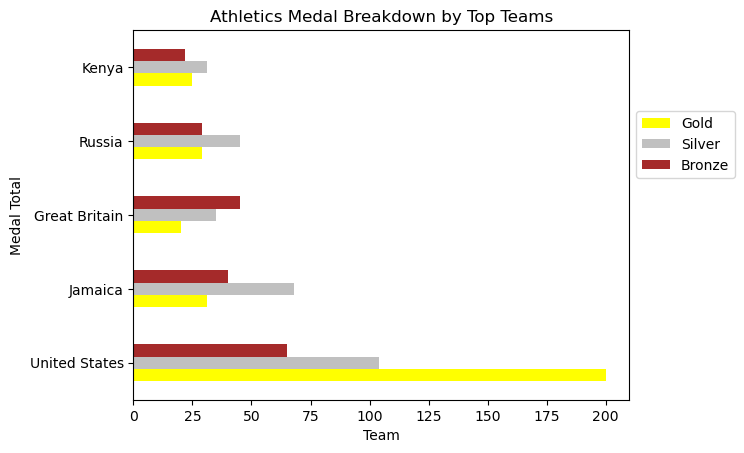

In [38]:
athletics_breakdown.plot(kind='barh', x='Team', color=['yellow', 'silver', 'brown'])

plt.xlabel('Team')
plt.ylabel('Medal Total')
plt.title('Athletics Medal Breakdown by Top Teams')
plt.legend(bbox_to_anchor = (1, 0.8), loc = 'upper left')
plt.savefig('athletics_breakdown.png', transparent=True, bbox_inches='tight')
plt.show()

In [39]:
athletics_top5 = medalists.loc[medalists['Sport'] == 'Athletics'].reset_index(drop=True)
athletics_top5['Name'].value_counts().head()

Name
Frederick Carlton "Carl" Lewis     10
Allyson Michelle Felix              9
Usain St. Leo Bolt                  8
Veronica Angella Campbell-Brown     8
Merlene Joyce Ottey-Page            8
Name: count, dtype: int64

In [40]:
athletics_top5 = athletics_top5.loc[athletics_top5['Name'].isin(['Frederick Carlton "Carl" Lewis', 'Allyson Michelle Felix', 
                                                                 'Usain St. Leo Bolt', 'Veronica Angella Campbell-Brown', 
                                                                 'Merlene Joyce Ottey-Page'])].reset_index(drop=True)
athletics_top5[['Name', 'Medal']].value_counts()

Name                             Medal 
Frederick Carlton "Carl" Lewis   Gold      9
Usain St. Leo Bolt               Gold      8
Allyson Michelle Felix           Gold      6
Merlene Joyce Ottey-Page         Bronze    5
Allyson Michelle Felix           Silver    3
Merlene Joyce Ottey-Page         Silver    3
Veronica Angella Campbell-Brown  Gold      3
                                 Silver    3
                                 Bronze    2
Frederick Carlton "Carl" Lewis   Silver    1
Name: count, dtype: int64

In [41]:
data = {'Name': ["Frederick Carlton 'Carl' Lewis, USA", "Allyson Michelle Felix, USA", "Usain St. Leo Bolt, JAM", 
                 "Veronica Angella Campbell-Brown, JAM", "Merlene Joyce Ottey-Page, JAM"],
        'Gold': [9, 6, 8, 3, 0],
        'Silver': [1, 3, 0, 3, 3],
        'Bronze': [0, 0, 0, 2, 5]}
athletics5_breakdown = pd.DataFrame(data)
athletics5_breakdown

,Name,Gold,Silver,Bronze
0,"Frederick Carlton 'Carl' Lewis, USA",9,1,0
1,"Allyson Michelle Felix, USA",6,3,0
2,"Usain St. Leo Bolt, JAM",8,0,0
3,"Veronica Angella Campbell-Brown, JAM",3,3,2
4,"Merlene Joyce Ottey-Page, JAM",0,3,5


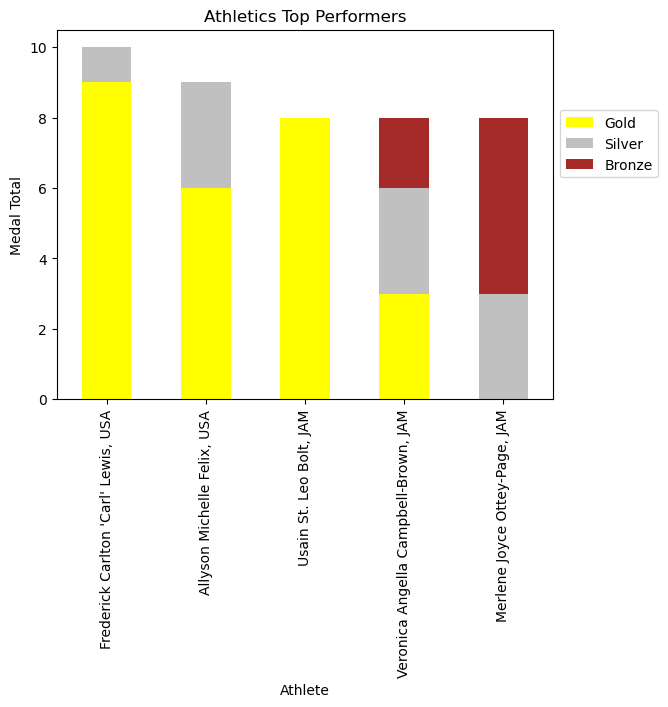

In [42]:
athletics5_breakdown.plot(kind='bar', stacked=True, x='Name', color=['yellow', 'silver', 'brown'])

plt.xlabel('Athlete')
plt.ylabel('Medal Total')
plt.title('Athletics Top Performers')
plt.legend(bbox_to_anchor = (1, 0.8), loc = 'upper left')
plt.savefig('athletics_top5.png', transparent=True, bbox_inches='tight')
plt.show()

In [43]:
olympic_games = medalists[['Team', 'Games', 'Medal']]
grouped = olympic_games.groupby(['Team', 'Games'])
olympic_games = grouped['Medal'].value_counts().reset_index()

In [44]:
olympic5 =olympic_games.loc[olympic_games['Team'].isin(['United States', 'Australia', 'Germany', 'Russia', 'China'])]
olympic5.head(60)

,Team,Games,Medal,count
38,Australia,1984 Summer,Bronze,31
39,Australia,1984 Summer,Silver,14
40,Australia,1984 Summer,Gold,7
41,Australia,1988 Summer,Gold,18
42,Australia,1988 Summer,Bronze,11
43,Australia,1988 Summer,Silver,6
44,Australia,1992 Summer,Silver,27
45,Australia,1992 Summer,Bronze,16
46,Australia,1992 Summer,Gold,14
47,Australia,1996 Summer,Bronze,82


In [45]:
medal_trends = pd.DataFrame({
    'United States': [(186+116+50), (87+66+54), (87+85+50), (157+52+46), (128+61+51), (115+75+69), (121+110+78), (139+55+44), (137+67+52)],
    'Australia': [(7+14+31), (18+6+11), (14+27+16), (32+16+82), (58+69+54), (49+77+31), (31+42+76), (18+37+59), (23+34+25)],
    'Germany': [0, 0, (81+57+60), (42+35+45), (31+23+62), (41+43+63), (39+16+41), (43+27+22), (47+43+67)],
    'Russia': [0, 0, 0, (36+45+34), (66+67+54), (48+46+95), (43+46+53), (50+39+49), (50+28+35)],
    'China': [(24+13+37), (4+16+30), (14+41+15), (13+66+15), (31+19+15), (42+27+13), (72+49+49), (50+38+29), (44+30+35)]},
                            index=[1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016])

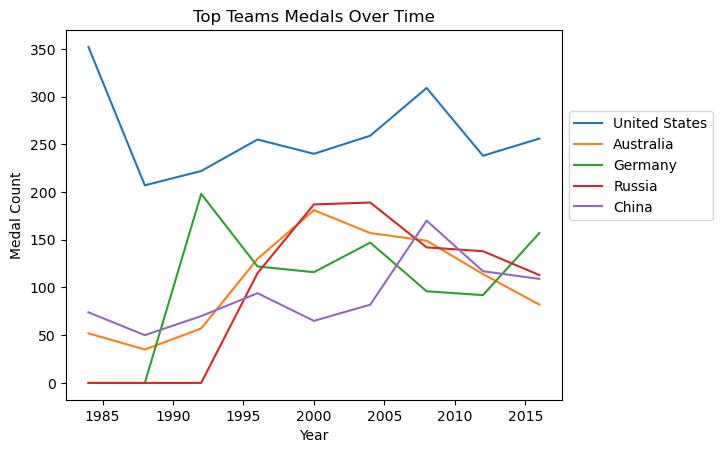

In [46]:
medal_trends.plot.line()

plt.title('Top Teams Medals Over Time')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.legend(bbox_to_anchor= (1,0.8), loc= 'upper left')
plt.savefig('medals_by_year.png', transparent=True, bbox_inches='tight')
plt.show()

In [47]:
medal_trends.describe()

,United States,Australia,Germany,Russia,China
count,9.000000,9.000000,9.000000,9.000000,9.000000
mean,259.777778,106.333333,103.111111,98.222222,92.333333
std,44.782189,52.019227,66.890665,78.313118,36.058979
min,207.000000,35.000000,0.000000,0.000000,50.000000
25%,238.000000,57.000000,92.000000,0.000000,70.000000
50%,255.000000,114.000000,116.000000,115.000000,82.000000
75%,259.000000,149.000000,147.000000,142.000000,109.000000
max,352.000000,181.000000,198.000000,189.000000,170.000000


In [48]:
medalists_gdp = gdp_per_capita.loc[(gdp_per_capita['Year'] == '1984') | (gdp_per_capita['Year'] == '1988') | (gdp_per_capita['Year'] == '1992') |
                    (gdp_per_capita['Year'] == '1996') | (gdp_per_capita['Year'] == '2000') | (gdp_per_capita['Year'] == '2004') | 
                    (gdp_per_capita['Year'] == '2008') | (gdp_per_capita['Year'] == '2012') | (gdp_per_capita['Year'] == '2016')].reset_index(drop=True)
medalists_gdp

,Country Name,Country Code,Year,GDP per Capita
0,Afghanistan,AFG,1984,..
1,Albania,ALB,1984,639.484730161417
2,Algeria,DZA,1984,2510.03683324232
3,American Samoa,ASM,1984,..
4,Andorra,AND,1984,7825.16015829635
...,...,...,...,...
1948,Virgin Islands (U.S.),VIR,2016,35324.9748874586
1949,West Bank and Gaza,PSE,2016,3527.61382413178
1950,"Yemen, Rep.",YEM,2016,1069.81700944581
1951,Zambia,ZMB,2016,1249.92314348406


In [49]:
medalists

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Birth Year
0,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,1981.0
1,72,Aleksey Aleksandrovich Abalmasov,M,28.0,180.0,83.0,Belarus,BLR,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Gold,1980.0
2,73,Luc Abalo,M,23.0,182.0,86.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,Gold,1985.0
3,73,Luc Abalo,M,27.0,182.0,86.0,France,FRA,2012 Summer,2012,Summer,London,Handball,Handball Men's Handball,Gold,1985.0
4,76,Jouan Patrice Abanda Etong,M,22.0,185.0,82.0,Cameroon,CMR,2000 Summer,2000,Summer,Sydney,Football,Football Men's Football,Gold,1978.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16624,135508,Vera Igorevna Zvonaryova,F,23.0,172.0,59.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Tennis,Tennis Women's Singles,Bronze,1985.0
16625,135525,Martin Zwicker,M,29.0,175.0,64.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Hockey,Hockey Men's Hockey,Bronze,1987.0
16626,135535,Claudia Antoinette Zwiers,F,22.0,181.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Judo,Judo Women's Middleweight,Bronze,1974.0
16627,135545,Henk Jan Zwolle,M,27.0,197.0,93.0,Netherlands,NED,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Double Sculls,Bronze,1965.0


In [50]:
noc_list = noc_regions['NOC'].to_list()

In [51]:
medalist_gdp = medalists_gdp.loc[medalists_gdp['Country Code'].isin(noc_list)]
medalist_gdp = medalists_gdp.rename(columns= {'Country Code': 'NOC'})
medalist_gdp

,Country Name,NOC,Year,GDP per Capita
0,Afghanistan,AFG,1984,..
1,Albania,ALB,1984,639.484730161417
2,Algeria,DZA,1984,2510.03683324232
3,American Samoa,ASM,1984,..
4,Andorra,AND,1984,7825.16015829635
...,...,...,...,...
1948,Virgin Islands (U.S.),VIR,2016,35324.9748874586
1949,West Bank and Gaza,PSE,2016,3527.61382413178
1950,"Yemen, Rep.",YEM,2016,1069.81700944581
1951,Zambia,ZMB,2016,1249.92314348406


In [52]:
pd.concat([medalists, medalist_gdp], keys=['NOC'])

C:\Users\devin\AppData\Local\Temp\ipykernel_10460\2962756955.py:1: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  pd.concat([medalists, medalist_gdp], keys=['NOC'])


ID                              Name Sex   Age  Height  Weight  \
NOC 0          21         Ragnhild Margrethe Aamodt   F  27.0   163.0     NaN   
    1          72  Aleksey Aleksandrovich Abalmasov   M  28.0   180.0    83.0   
    2          73                         Luc Abalo   M  23.0   182.0    86.0   
    3          73                         Luc Abalo   M  27.0   182.0    86.0   
    4          76        Jouan Patrice Abanda Etong   M  22.0   185.0    82.0   
...           ...                               ...  ..   ...     ...     ...   
    16624  135508          Vera Igorevna Zvonaryova   F  23.0   172.0    59.0   
    16625  135525                    Martin Zwicker   M  29.0   175.0    64.0   
    16626  135535         Claudia Antoinette Zwiers   F  22.0   181.0    78.0   
    16627  135545                   Henk Jan Zwolle   M  27.0   197.0    93.0   
    16628  135563         Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   

                  Team  NOC        Games  Year  Season            City  \
NOC 0           Norway  NOR  2008 Summer  2008  Summer         Beijing   
    1          Belarus  BLR  2008 Summer  2008  Summer         Beijing   
    2           France  FRA  2008 Summer  2008  Summer         Beijing   
    3           France  FRA  2012 Summer  2012  Summer          London   
    4         Cameroon  CMR  2000 Summer  2000  Summer          Sydney   
...                ...  ...          ...   ...     ...             ...   
    16624       Russia  RUS  2008 Summer  2008  Summer         Beijing   
    16625      Germany  GER  2016 Summer  2016  Summer  Rio de Janeiro   
    16626  Netherlands  NED  1996 Summer  1996  Summer         Atlanta   
    16627  Netherlands  NED  1992 Summer  1992  Summer       Barcelona   
    16628       Russia  RUS  2000 Summer  2000  Summer          Sydney   

               Sport                                     Event   Medal  \
NOC 0       Handball                 Handball Women's Handball    Gold   
    1       Canoeing  Canoeing Men's Kayak Fours, 1,000 metres    Gold   
    2       Handball                   Handball Men's Handball    Gold   
    3       Handball                   Handball Men's Handball    Gold   
    4       Football                   Football Men's Football    Gold   
...              ...                                       ...     ...   
    16624     Tennis                    Tennis Women's Singles  Bronze   
    16625     Hockey                       Hockey Men's Hockey  Bronze   
    16626       Judo                 Judo Women's Middleweight  Bronze   
    16627     Rowing                Rowing Men's Double Sculls  Bronze   
    16628  Athletics    Athletics Women's 4 x 400 metres Relay  Bronze   

           Birth Year  
NOC 0          1981.0  
    1          1980.0  
    2          1985.0  
    3          1985.0  
    4          1978.0  
...               ...  
    16624      1985.0  
    16625      1987.0  
    16626      1974.0  
    16627      1965.0  
    16628      1981.0  

[16629 rows x 16 columns]

In [53]:
athletics_top5

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Birth Year
0,13029,Usain St. Leo Bolt,M,21.0,196.0,95.0,Jamaica,JAM,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,Gold,1987.0
1,13029,Usain St. Leo Bolt,M,21.0,196.0,95.0,Jamaica,JAM,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 200 metres,Gold,1987.0
2,13029,Usain St. Leo Bolt,M,25.0,196.0,95.0,Jamaica,JAM,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 100 metres,Gold,1987.0
3,13029,Usain St. Leo Bolt,M,25.0,196.0,95.0,Jamaica,JAM,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 200 metres,Gold,1987.0
4,13029,Usain St. Leo Bolt,M,25.0,196.0,95.0,Jamaica,JAM,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 4 x 100 metres Relay,Gold,1987.0
5,13029,Usain St. Leo Bolt,M,29.0,196.0,95.0,Jamaica,JAM,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,Gold,1987.0
6,13029,Usain St. Leo Bolt,M,29.0,196.0,95.0,Jamaica,JAM,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 200 metres,Gold,1987.0
7,13029,Usain St. Leo Bolt,M,29.0,196.0,95.0,Jamaica,JAM,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 100 metres Relay,Gold,1987.0
8,17755,Veronica Angella Campbell-Brown,F,22.0,168.0,58.0,Jamaica,JAM,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 200 metres,Gold,1982.0
9,17755,Veronica Angella Campbell-Brown,F,22.0,168.0,58.0,Jamaica,JAM,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 100 metres Relay,Gold,1982.0


In [54]:
usa_gender = medalists.loc[medalists['NOC'] == 'USA'].reset_index(drop=True)
usa_gender

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Birth Year
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold,1977.0
1,423,Michael Brent Abernathy,M,22.0,182.0,84.0,United States,USA,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,Gold,1978.0
2,963,Derrick Ralph Adkins,M,26.0,188.0,80.0,United States,USA,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 400 metres Hurdles,Gold,1970.0
3,1017,Nathan Ghar-Jun Adrian,M,19.0,198.0,100.0,United States,USA,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Gold,1989.0
4,1017,Nathan Ghar-Jun Adrian,M,23.0,198.0,100.0,United States,USA,2012 Summer,2012,Summer,London,Swimming,Swimming Men's 100 metres Freestyle,Gold,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,133685,Mariel Leigh Zagunis,F,31.0,173.0,72.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Fencing,"Fencing Women's Sabre, Team",Bronze,1985.0
2372,133972,Kendra Zanotto,F,22.0,162.0,52.0,United States,USA,2004 Summer,2004,Summer,Athina,Synchronized Swimming,Synchronized Swimming Women's Team,Bronze,1982.0
2373,134319,Kathryn Paige Zemina (-Northcutt),F,20.0,183.0,70.0,United States,USA,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze,1968.0
2374,134392,"Yoko Karin Zetterlund (-Bush, -Hiroshi)",F,23.0,180.0,65.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Volleyball,Volleyball Women's Volleyball,Bronze,1969.0


In [55]:
usa_gender[['Sex', 'Year', 'Medal']].value_counts()

Sex  Year  Medal 
M    1984  Gold      115
F    2012  Gold      103
     1996  Gold      100
     2016  Gold       85
     2008  Silver     81
     1984  Gold       71
M    1984  Silver     71
     2008  Gold       69
     2000  Gold       68
F    2004  Gold       65
     2000  Gold       62
M    1996  Gold       59
     1988  Gold       58
F    2008  Gold       58
M    1992  Gold       57
     2008  Bronze     57
     2016  Gold       54
     2004  Gold       52
F    1992  Bronze     50
M    1988  Silver     45
F    1984  Silver     45
     2004  Silver     42
M    2012  Gold       42
     1996  Bronze     41
F    2004  Bronze     39
M    1988  Bronze     37
     2016  Bronze     36
F    2016  Bronze     35
M    1992  Bronze     35
     2004  Silver     33
           Bronze     32
     1996  Silver     32
F    1992  Gold       32
     2000  Silver     32
M    1992  Silver     31
F    2000  Bronze     30
     2012  Silver     30
M    2008  Silver     29
F    2016  Silver     29
     19

In [56]:
usa_women = usa_gender.loc[usa_gender['Sex'] == 'F'][['Sex', 'Medal', 'Year']]
usa_women

,Sex,Medal,Year
9,F,Gold,1992
10,F,Gold,1992
13,F,Gold,1996
14,F,Gold,2016
18,F,Gold,2000
...,...,...,...
2371,F,Bronze,2016
2372,F,Bronze,2004
2373,F,Bronze,1988
2374,F,Bronze,1992


In [57]:
usa_men = usa_gender.loc[usa_gender['Sex'] == 'M'][['Sex', 'Medal', 'Year']]
usa_men

,Sex,Medal,Year
0,M,Gold,2000
1,M,Gold,2000
2,M,Gold,1996
3,M,Gold,2008
4,M,Gold,2012
...,...,...,...
2360,M,Bronze,2000
2361,M,Bronze,1996
2362,M,Bronze,2004
2365,M,Bronze,2004


In [58]:
usa_women.value_counts()

Sex  Medal   Year
F    Gold    2012    103
             1996    100
             2016     85
     Silver  2008     81
     Gold    1984     71
             2004     65
             2000     62
             2008     58
     Bronze  1992     50
     Silver  1984     45
             2004     42
     Bronze  2004     39
             2016     35
     Silver  2000     32
     Gold    1992     32
     Bronze  2000     30
     Silver  2012     30
             2016     29
     Gold    1988     29
     Bronze  2012     27
             1984     24
             2008     23
     Silver  1988     21
             1992     19
     Bronze  1988     17
     Silver  1996     16
     Bronze  1996     11
Name: count, dtype: int64

In [59]:
usa_men.value_counts()

Sex  Medal   Year
M    Gold    1984    115
     Silver  1984     71
     Gold    2008     69
             2000     68
             1996     59
             1988     58
             1992     57
     Bronze  2008     57
     Gold    2016     54
             2004     52
     Silver  1988     45
     Gold    2012     42
     Bronze  1996     41
             1988     37
             2016     36
             1992     35
     Silver  2004     33
     Bronze  2004     32
     Silver  1996     32
             1992     31
             2008     29
             2000     29
             2012     27
     Bronze  1984     26
     Silver  2016     25
     Bronze  2000     21
             2012     19
Name: count, dtype: int64

In [60]:
performance_trends = pd.DataFrame({
    'Women': [(71+45+24), (29+21+17), (32+19+50), (100+16+11), (62+32+30), (65+42+39), (58+81+23), (103+30+27), (85+29+35)],
    'Men': [(115+71+26), (58+45+37), (57+31+35), (59+32+41), (68+29+21), (52+33+32), (69+29+57), (42+27+19), (54+25+39)]},
                            index=[1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016])
performance_trends

,Women,Men
1984,140,212
1988,67,140
1992,101,123
1996,127,132
2000,124,118
2004,146,117
2008,162,155
2012,160,88
2016,149,118


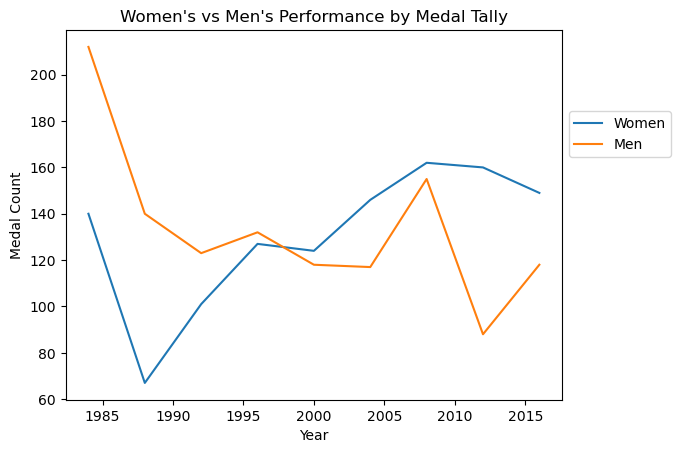

In [61]:
performance_trends.plot.line()

plt.title("Women's vs Men's Performance by Medal Tally")
plt.xlabel("Year")
plt.ylabel("Medal Count")
plt.legend(bbox_to_anchor= (1,0.8), loc= 'upper left')
plt.savefig('performance_by_year.png', transparent=True, bbox_inches='tight')
plt.show()

In [62]:
performance_trends.describe()

,Women,Men
count,9.000000,9.000000
mean,130.666667,133.666667
std,30.602287,34.644624
min,67.000000,88.000000
25%,124.000000,118.000000
50%,140.000000,123.000000
75%,149.000000,140.000000
max,162.000000,212.000000


In [63]:
ath_events.loc[ath_events['Season'] == 'Summer']['Event'].drop_duplicates().reset_index(drop=True)

0                      Basketball Men's Basketball
1                     Judo Men's Extra-Lightweight
2                          Badminton Men's Singles
3                       Sailing Women's Windsurfer
4                         Athletics Men's Shot Put
                          ...                     
356                         Cycling Women's Keirin
357    Canoeing Men's Canadian Singles, 200 metres
358                         Cycling Women's Omnium
359                          Judo Men's Open Class
360                    Cycling Women's Team Sprint
Name: Event, Length: 361, dtype: object

In [64]:
medal_trends = medal_trends.reset_index().rename(columns= {'index': 'Year'})
medal_trends

,Year,United States,Australia,Germany,Russia,China
0,1984,352,52,0,0,74
1,1988,207,35,0,0,50
2,1992,222,57,198,0,70
3,1996,255,130,122,115,94
4,2000,240,181,116,187,65
5,2004,259,157,147,189,82
6,2008,309,149,96,142,170
7,2012,238,114,92,138,117
8,2016,256,82,157,113,109


In [65]:
medal_trends.to_csv('medal_trends.csv', index=False)

In [66]:
usa_ath = medalists.loc[medalists['NOC'] == 'USA'][['Name', 'Year', 'Birth Year']].drop_duplicates().sort_values(['Name', 'Year']).reset_index(drop=True)
usa_ath['Birth Year'] = usa_ath['Birth Year'].astype('int')
usa_ath

,Name,Year,Birth Year
0,Aaron Russell,2016,1993
1,Aaron Wells Peirsol,2000,1983
2,Aaron Wells Peirsol,2004,1983
3,Aaron Wells Peirsol,2008,1983
4,Abbey Weitzeil,2016,1997
...,...,...,...
1972,Zach Garrett,2016,1995
1973,"Zachary Scott ""Zach"" Railey",2008,1984
1974,Zina Lynna Garrison (-Jackson),1988,1964
1975,"Zsuzsanna ""Susan"" Francia",2008,1983


In [67]:
usa_life_exp = life_exp.loc[life_exp['Country Code'] == 'USA'].reset_index(drop=True)
usa_life_exp

,Country Name,Country Code,Birth Year,Life Expectancy
0,United States,USA,1880,39
1,United States,USA,1890,45
2,United States,USA,1901,49
3,United States,USA,1902,50
4,United States,USA,1903,51
...,...,...,...,...
120,United States,USA,2019,79
121,United States,USA,2020,77
122,United States,USA,2021,76
123,United States,USA,2022,78


In [68]:
ath_exp = pd.merge(usa_ath, usa_life_exp, how='inner', on=['Birth Year']).drop(columns = ['Country Name', 'Country Code'])
ath_exp

,Name,Year,Birth Year,Life Expectancy
0,Aaron Russell,2016,1993,76
1,Aaron Wells Peirsol,2000,1983,75
2,Aaron Wells Peirsol,2004,1983,75
3,Aaron Wells Peirsol,2008,1983,75
4,Abbey Weitzeil,2016,1997,76
...,...,...,...,...
1972,Zach Garrett,2016,1995,76
1973,"Zachary Scott ""Zach"" Railey",2008,1984,75
1974,Zina Lynna Garrison (-Jackson),1988,1964,70
1975,"Zsuzsanna ""Susan"" Francia",2008,1983,75


In [69]:
ath_exp.to_csv('ath_exp.csv', index=False)

In [70]:
medal_trends

,Year,United States,Australia,Germany,Russia,China
0,1984,352,52,0,0,74
1,1988,207,35,0,0,50
2,1992,222,57,198,0,70
3,1996,255,130,122,115,94
4,2000,240,181,116,187,65
5,2004,259,157,147,189,82
6,2008,309,149,96,142,170
7,2012,238,114,92,138,117
8,2016,256,82,157,113,109


In [71]:
life_exp = life_exp.replace({'DEU': 'GER'})

In [72]:
top5_life_exp = life_exp.loc[(life_exp['Country Name'] == 'United States') | (life_exp['Country Name'] == 'Australia') | 
                (life_exp['Country Name'] == 'Germany') | (life_exp['Country Name'] == 'Russia') | (life_exp['Country Name'] == 'China')].reset_index(drop=True)
top5_life_exp = top5_life_exp.rename(columns= {'Country Code': 'NOC'})
top5_life_exp

,Country Name,NOC,Birth Year,Life Expectancy
0,Australia,AUS,1885,49
1,Australia,AUS,1895,53
2,Australia,AUS,1905,57
3,Australia,AUS,1921,61
4,Australia,AUS,1922,63
...,...,...,...,...
488,United States,USA,2019,79
489,United States,USA,2020,77
490,United States,USA,2021,76
491,United States,USA,2022,78


In [73]:
country5_medalists = medalists.loc[(medalists['Team'] == 'United States') | (medalists['Team'] == 'Australia') | (medalists['Team'] == 'Germany') | 
                (medalists['Team'] == 'Russia') | (medalists['Team'] == 'China')][['Name', 'NOC', 'Year', 'Birth Year']].reset_index(drop=True)
country5_medalists['Birth Year'] = country5_medalists['Birth Year'].astype('int')
country5_medalists

,Name,NOC,Year,Birth Year
0,Julius Shareef Abdur-Rahim,USA,2000,1977
1,Michael Brent Abernathy,USA,2000,1978
2,Filip Kamil Adamski,GER,2012,1983
3,Derrick Ralph Adkins,USA,1996,1970
4,Nathan Ghar-Jun Adrian,USA,2008,1989
...,...,...,...,...
5933,Zou Kai,CHN,2012,1988
5934,Zou Shiming,CHN,2004,1981
5935,Vera Igorevna Zvonaryova,RUS,2008,1985
5936,Martin Zwicker,GER,2016,1987


In [74]:
country5_exp = pd.merge(country5_medalists, top5_life_exp, how='inner', on=['NOC', 'Birth Year']).drop(columns= 
                                                                                 ['Country Name'])
country5_exp

,Name,NOC,Year,Birth Year,Life Expectancy
0,Julius Shareef Abdur-Rahim,USA,2000,1977,73
1,Michael Brent Abernathy,USA,2000,1978,73
2,Filip Kamil Adamski,GER,2012,1983,74
3,Derrick Ralph Adkins,USA,1996,1970,71
4,Nathan Ghar-Jun Adrian,USA,2008,1989,75
...,...,...,...,...,...
5927,Zou Kai,CHN,2012,1988,68
5928,Zou Shiming,CHN,2004,1981,65
5929,Vera Igorevna Zvonaryova,RUS,2008,1985,68
5930,Martin Zwicker,GER,2016,1987,75


In [75]:
usa_exp = country5_exp.loc[country5_exp['NOC'] == 'USA'][['Year', 'Life Expectancy']].value_counts().to_frame().sort_values('Year', ascending=True).reset_index()
usa_exp 

,Year,Life Expectancy,count
0,1984,70,283
1,1984,63,1
2,1984,66,1
3,1984,71,4
4,1984,67,4
...,...,...,...
57,2016,73,3
58,2016,76,123
59,2016,77,4
60,2016,75,111


In [76]:
country5_exp.to_csv('country5_exp.csv', index=False)

In [77]:
country5_exp

,Name,NOC,Year,Birth Year,Life Expectancy
0,Julius Shareef Abdur-Rahim,USA,2000,1977,73
1,Michael Brent Abernathy,USA,2000,1978,73
2,Filip Kamil Adamski,GER,2012,1983,74
3,Derrick Ralph Adkins,USA,1996,1970,71
4,Nathan Ghar-Jun Adrian,USA,2008,1989,75
...,...,...,...,...,...
5927,Zou Kai,CHN,2012,1988,68
5928,Zou Shiming,CHN,2004,1981,65
5929,Vera Igorevna Zvonaryova,RUS,2008,1985,68
5930,Martin Zwicker,GER,2016,1987,75


In [78]:
life_exp5 = country5_exp[['NOC', 'Year', 'Birth Year', 'Life Expectancy']]
grouped5 = life_exp5.groupby(['NOC', 'Year'])
life_exp5 = grouped5['Life Expectancy'].value_counts()
life_exp5 = life_exp5.to_frame().reset_index()
aus_exp = life_exp5.loc[life_exp5['NOC'] == 'AUS'][['Year', 'Life Expectancy', 'count']]
aus_exp

,Year,Life Expectancy,count
0,1984,71,39
1,1984,70,12
2,1984,66,1
3,1988,71,32
4,1988,70,3
5,1992,71,42
6,1992,72,13
7,1992,70,2
8,1996,71,65
9,1996,72,40


In [138]:
chn_exp = life_exp5.loc[life_exp5['NOC'] == 'CHN'][['Year', 'Life Expectancy', 'count']]
chn_exp.head(60)74

,Year,Life Expectancy,count
48,1984,52,32
49,1984,40,10
50,1984,49,10
51,1984,53,5
52,1984,48,4
53,1984,51,4
54,1984,33,3
55,1984,54,3
56,1984,55,2
57,1984,56,1


In [80]:
rus_exp = life_exp5.loc[life_exp5['NOC'] == 'RUS'][['Year', 'Life Expectancy', 'count']]
rus_exp

,Year,Life Expectancy,count
198,1996,69,75
199,1996,68,33
200,1996,67,6
201,1996,55,1
202,2000,68,93
203,2000,69,87
204,2000,67,7
205,2004,68,105
206,2004,69,58
207,2004,67,14


In [110]:
usa_exp = life_exp5.loc[life_exp5['NOC'] == 'USA'][['Year', 'Life Expectancy', 'count']]
usa_exp.head(60)

,Year,Life Expectancy,count
226,1984,70,283
227,1984,69,41
228,1984,68,17
229,1984,67,4
230,1984,71,4
231,1984,61,1
232,1984,63,1
233,1984,66,1
234,1988,70,172
235,1988,71,26


In [84]:
ger_exp = life_exp5.loc[life_exp5['NOC'] == 'GER'][['Year', 'Life Expectancy', 'count']]
ger_exp

,Year,Life Expectancy,count
151,1992,71,130
152,1992,70,48
153,1992,72,6
154,1992,73,5
155,1992,69,3
156,1992,68,1
157,1996,71,73
158,1996,70,18
159,1996,72,15
160,1996,73,10


In [140]:
top5_life_exp = pd.DataFrame({
    'United States': [(70), (70), (70), (71), (72), (73), (74), (75), (75)],
    'Australia': [(71), (71), (71), (72), (72), (74), (75), (76), (77)],
    'Germany': [0, 0, (72), (71), (72), (72), (73), (74), (75)],
    'Russia': [0, 0, 0, (68), (68), (68), (68), (68), (67)],
    'China': [(49), (53), (57), (58), (62), (64), (66), (68), (69)]},
                            index=[1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]).reset_index().rename(columns= {'index': 'Year'})
top5_life_exp

,Year,United States,Australia,Germany,Russia,China
0,1984,70,71,0,0,49
1,1988,70,71,0,0,53
2,1992,70,71,72,0,57
3,1996,71,72,71,68,58
4,2000,72,72,72,68,62
5,2004,73,74,72,68,64
6,2008,74,75,73,68,66
7,2012,75,76,74,68,68
8,2016,75,77,75,67,69


In [120]:
medal_trends

,Year,United States,Australia,Germany,Russia,China
0,1984,352,52,0,0,74
1,1988,207,35,0,0,50
2,1992,222,57,198,0,70
3,1996,255,130,122,115,94
4,2000,240,181,116,187,65
5,2004,259,157,147,189,82
6,2008,309,149,96,142,170
7,2012,238,114,92,138,117
8,2016,256,82,157,113,109


In [142]:
top5_life_exp

,Year,United States,Australia,Germany,Russia,China
0,1984,70,71,0,0,49
1,1988,70,71,0,0,53
2,1992,70,71,72,0,57
3,1996,71,72,71,68,58
4,2000,72,72,72,68,62
5,2004,73,74,72,68,64
6,2008,74,75,73,68,66
7,2012,75,76,74,68,68
8,2016,75,77,75,67,69


In [150]:
data = {'Country': ['United States', 'United States', 'United States', 'United States', 'United States', 'United States', 
                    'United States', 'United States', 'United States', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 'Australia', 
                    'Australia', 'Australia', 'Australia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 'Russia', 
                    'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'Germany', 'China', 'China', 'China', 
                    'China', 'China', 'China', 'China', 'China', 'China'],
        'Year': [1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 1984, 1988, 1992, 1996, 
                 2000, 2004, 2008, 2012, 2016, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 
                 2016],
        'Medal Count': [352, 207, 222, 255, 240, 259, 309, 238, 256, 52, 35, 57, 130, 181, 157, 149, 114, 82, 0, 0, 0, 115, 187, 189, 142, 138, 113, 
                        0, 0 , 198, 122, 116, 147, 96, 92, 157, 74, 50, 70, 94, 65, 82, 170, 117, 109],
        'Life Expectancy': [70, 70,70, 71, 72, 73, 74, 75, 75, 71, 71, 71, 72, 72, 74, 75, 76, 77, 0, 0, 0, 68, 68, 68, 68, 68, 67, 0, 0, 72, 71, 72, 
                            72, 73, 74, 75, 49,53, 57, 58, 62, 64, 66, 68, 69]}
top5_medal_exp = pd.DataFrame(data)

In [152]:
top5_medal_exp.to_csv('medal_exp.csv', index=False)

In [ ]:
# ipl_tot.sort_values(by=(['Matches Won', 'Win Percent']), ascending=False, inplace=True)

In [ ]:
#https://pandas.pydata.org/docs/reference/api/pandas.melt.html

In [ ]:
#https://www.geeksforgeeks.org/python-pandas-melt/